In [6]:
users.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength,bio_word_count,surname
0,brianyu28,Brian Yu,UNKNOWN,"Boston, MA",brian@brianyu.me,False,Software developer and educator,35,13197,13,2015-11-29 07:25:29+00:00,942.642857,4,Yu
1,PatrickAlphaC,Patrick Collins,CYFRIN,"Boston, MA",NaN,False,"Smart Contract Engineer, Auditor, and Educator",272,9658,43,2019-08-19 14:13:41+00:00,219.500000,6,Collins
2,KeithGalli,Keith Galli,UNKNOWN,"Boston, MA",NaN,True,YouTube Content Creator :).,52,5676,1,2013-12-25 19:49:26+00:00,2838.000000,4,Galli
3,CharlesCreativeContent,Shawn Charles,AMAZON,"Boston, MA",NaN,True,Software Engineer building Tech Communities,83,5054,1092,2020-03-11 20:10:11+00:00,4.623971,5,Charles
4,timbl,Tim Berners-Lee,INRUPT,"Boston, MA",timbl@w3.org,False,No bio available,18,4849,69,2011-12-11 01:28:03+00:00,69.271429,3,Berners-Lee


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the data
users = pd.read_csv('users.csv')
repos = pd.read_csv('repositories.csv')

# Clean the 'company' column in the users DataFrame
users['company'] = users['company'].str.strip().str.lstrip('@').str.upper()

# Question 1: Top 5 users by number of followers
top_5_followers = users.sort_values(by='followers', ascending=False).head(5)['login']
print("Top 5 users by followers:", ','.join(top_5_followers))

# Question 2: 5 earliest registered users by 'created_at'
users['created_at'] = pd.to_datetime(users['created_at'])
earliest_users = users.sort_values(by='created_at').head(5)['login']
print("5 earliest registered users:", ','.join(earliest_users))

# Question 3: Top 3 most popular licenses
top_licenses = repos['license_name'].dropna().value_counts().head(3).index.tolist()
print("Top 3 most popular licenses:", ','.join(top_licenses))

# Question 4: Most common company
most_common_company = users['company'].mode()[0]
print("Most common company:", most_common_company)

# Question 5: Most popular programming language
most_popular_language = repos['language'].value_counts().idxmax()
print("Most popular language:", most_popular_language)

# Question 6: Second most popular language for users who joined after 2020
second_popular_language = repos[
    repos['created_at'] >= '2020-01-01'
]['language'].value_counts().index[1]
print("Second most popular language after 2020:", second_popular_language)

# Question 7: Language with highest average stars
average_stars = repos.groupby('language')['stargazers_count'].mean()
highest_avg_stars_language = average_stars.idxmax()
print("Language with highest average stars:", highest_avg_stars_language)

# Question 8: Top 5 users by leader_strength
users['leader_strength'] = users['followers'] / (1 + users['following'])
top_5_leader_strength = users.sort_values(by='leader_strength', ascending=False).head(5)['login']
print("Top 5 users by leader strength:", ','.join(top_5_leader_strength))

# Question 9: Correlation between followers and public repos
correlation_followers_repos = users['followers'].corr(users['public_repos'])
print("Correlation between followers and repos:", round(correlation_followers_repos, 3))

# Question 10: Regression slope of followers on repos
X = users[['public_repos']]
y = users['followers']
model = LinearRegression().fit(X, y)
slope = model.coef_[0]
print("Regression slope of followers on repos:", round(slope, 3))

# Question 11: Correlation between projects and wiki enabled
projects_wiki_corr = repos['has_projects'].corr(repos['has_wiki'])
print("Correlation between projects and wiki enabled:", round(projects_wiki_corr, 3))

# Question 12: Hireable vs. following comparison
hireable_avg_following = users[users['hireable'] == True]['following'].mean()
non_hireable_avg_following = users[users['hireable'] == False]['following'].mean()
avg_following_difference = hireable_avg_following - non_hireable_avg_following
print("Difference in average following (hireable vs non-hireable):", round(avg_following_difference, 3))

# Question 13: Regression slope of followers on bio word count
users['bio_word_count'] = users['bio'].fillna('').apply(lambda x: len(x.split()))
bio_users = users[users['bio_word_count'] > 0]
X_bio = bio_users[['bio_word_count']]
y_bio = bio_users['followers']
bio_model = LinearRegression().fit(X_bio, y_bio)
bio_slope = bio_model.coef_[0]
print("Regression slope of followers on bio word count:", round(bio_slope, 3))

# Question 14: Top 5 users with most repositories created on weekends
repos['created_at'] = pd.to_datetime(repos['created_at'])
repos['created_day'] = repos['created_at'].dt.dayofweek
weekend_repos = repos[repos['created_day'] >= 5]  # 5 = Saturday, 6 = Sunday
weekend_repos_count = weekend_repos['login'].value_counts().head(5)
print("Top 5 users by weekend repo creation:", ','.join(weekend_repos_count.index))

# Question 15: Email sharing by hireable status
email_hireable = users[users['hireable'] == True]['email'].notna().mean()
email_non_hireable = users[users['hireable'] == False]['email'].notna().mean()
email_fraction_difference = email_hireable - email_non_hireable
print("Difference in email sharing (hireable vs non-hireable):", round(email_fraction_difference, 3))

# Question 16: Most common surname
users['surname'] = users['name'].fillna('').apply(lambda x: x.split()[-1] if x else '')
most_common_surname = users['surname'].value_counts().head(1).index[0]
print("Most common surname:", most_common_surname)


Top 5 users by followers: brianyu28,PatrickAlphaC,KeithGalli,CharlesCreativeContent,timbl
5 earliest registered users: evan,dpickett,tel,radical,joshuaclayton
Top 3 most popular licenses: mit,other,apache-2.0
Most common company: UNKNOWN
Most popular language: javascript
Second most popular language after 2020: unknown
Language with highest average stars: handlebars
Top 5 users by leader strength: nikomatsakis,ccoenraets,KeithGalli,rstudio,pluskid
Correlation between followers and repos: 0.168
Regression slope of followers on repos: 1.191
Correlation between projects and wiki enabled: 0.425
Difference in average following (hireable vs non-hireable): 112.041
Regression slope of followers on bio word count: -3.535
Top 5 users by weekend repo creation: rwaldron,bahmutov,PatrickAlphaC,nikomatsakis,migueldeicaza
Difference in email sharing (hireable vs non-hireable): 0.113
Most common surname: Williams


#1. Outlier Detection:
High Follower Counts: Check for users with significantly more followers compared to the rest.
Repositories with High Star Counts: Identify repositories with an unusually high number of stars and inspect their details.
High Leader Strength: Users with an exceptionally high leader_strength might indicate influential users.

In [2]:
# Users with unusually high follower counts
high_followers = users[users['followers'] > users['followers'].quantile(0.95)]
print("Users with unusually high followers:", high_followers[['login', 'followers']])

# Repositories with exceptionally high star counts
high_star_repos = repos[repos['stargazers_count'] > repos['stargazers_count'].quantile(0.95)]
print("Repositories with high star counts:", high_star_repos[['full_name', 'stargazers_count']])

# Users with outlier leader strength
high_leader_strength = users[users['leader_strength'] > users['leader_strength'].quantile(0.95)]
print("Users with high leader strength:", high_leader_strength[['login', 'leader_strength']])


Users with unusually high followers:                      login  followers
0                brianyu28      13197
1            PatrickAlphaC       9658
2               KeithGalli       5676
3   CharlesCreativeContent       5054
4                    timbl       4849
5                 bahmutov       4792
6            migueldeicaza       4690
7                 rwaldron       4406
8             nikomatsakis       3905
9                      lh3       3870
10                  cowboy       3542
11                 jlooper       3177
12              ccoenraets       2973
13                 rstudio       2694
14                 pluskid       2520
15                leonnoel       2359
16                  nedbat       2287
17                  rapid7       1991
18              quantopian       1895
19             cferdinandi       1836
20              processing       1646
21               davisking       1597
22               markbates       1577
23                    r00k       1570
Repositories 

#2. Trends and Unexpected Correlations:
Follower vs. Repository Count: Verify if users with fewer repositories have proportionally higher followers.
Bio Word Count: Check if there's a non-linear or surprising relationship between bio word count and follower count.
Activity on Weekends: Analyze if certain users are more active on weekends, which could indicate non-standard working patterns.

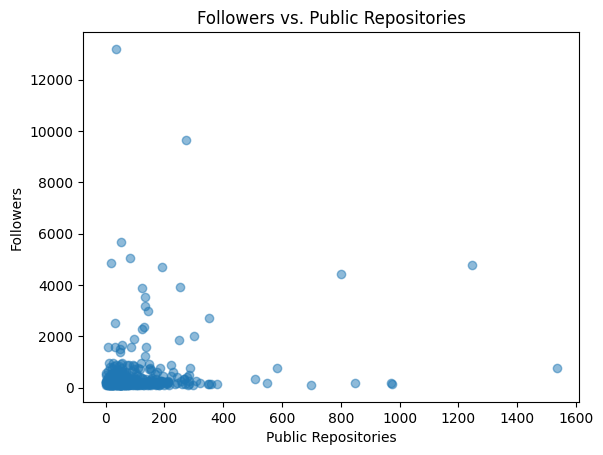

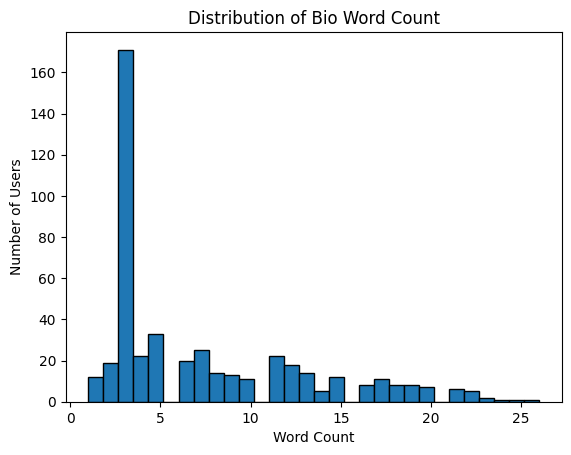

In [3]:
# Scatter plot of followers vs public repositories
import matplotlib.pyplot as plt

plt.scatter(users['public_repos'], users['followers'], alpha=0.5)
plt.title('Followers vs. Public Repositories')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()

# Histogram of bio word counts
plt.hist(users['bio_word_count'], bins=30, edgecolor='black')
plt.title('Distribution of Bio Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of Users')
plt.show()


#3. License and Language Analysis:
Rare Licenses: Find any uncommon or less-used licenses among the repositories.
Niche Programming Languages: Check for programming languages that are used but not among the top few.

In [4]:
# Find rare licenses
rare_licenses = repos['license_name'].value_counts().tail(5)
print("Rare licenses:", rare_licenses)

# Find niche programming languages
niche_languages = repos['language'].value_counts().tail(5)
print("Niche programming languages:", niche_languages)


Rare licenses: license_name
mpl-2.0         4
lgpl-2.1        1
cc-by-sa-4.0    1
wtfpl           1
mit-0           1
Name: count, dtype: int64
Niche programming languages: language
batchfile     1
powershell    1
clojure       1
squirrel      1
postscript    1
Name: count, dtype: int64


#4. Peculiar Activity Patterns:
Active Days: Determine if any users contribute heavily on specific days of the week, implying non-standard coding hours.
User Behavior: Look for users with a large number of repositories but low engagement (stars, watchers).

In [7]:
# Analyze activity patterns by day of the week
repos['created_day_name'] = repos['created_at'].dt.day_name()
day_activity = repos['created_day_name'].value_counts()
print("Repository creation by day of the week:", day_activity)

# Users with many repositories but low stars
low_star_repos = repos[(users['public_repos'] > 50) & (repos['stargazers_count'] < 10)]
print("Users with many repos but low stars:", low_star_repos[['login', 'full_name', 'stargazers_count']])


Repository creation by day of the week: created_day_name
Thursday     396
Friday       395
Wednesday    386
Tuesday      369
Monday       336
Saturday     221
Sunday       192
Name: count, dtype: int64
Users with many repos but low stars:          login                      full_name  stargazers_count
2    brianyu28              brianyu28/holyoke                 6
5    brianyu28            brianyu28/momentary                 3
8    brianyu28         brianyu28/spanningtree                 2
11   brianyu28  brianyu28/streamline-homepage                 2
15   brianyu28         brianyu28/courseboards                 5
..         ...                            ...               ...
456      timbl                   timbl/ldnode                 6
459      timbl                timbl/kokopelli                 9
461   bahmutov              bahmutov/tdd-calc                 0
464   bahmutov              bahmutov/git-last                 4
466   bahmutov               bahmutov/was-tdd            